# Step 1: Variable Correlation

I'll start by selecting a subset of columns that seem most relevant to loan approval. We'll then compute the correlation matrix and visualize it using a heatmap.

Columns Selection:
Here are some columns that intuitively seem relevant to loan approval:

TARGET: This is our target variable, indicating loan approval.
NAME_CONTRACT_TYPE: The type of loan.
CODE_GENDER: Gender of the applicant.
FLAG_OWN_CAR: Whether the applicant owns a car.
FLAG_OWN_REALTY: Whether the applicant owns real estate property.
CNT_CHILDREN: Number of children.
AMT_INCOME_TOTAL: Total income of the applicant.
AMT_CREDIT: Loan credit amount.
AMT_ANNUITY: Loan annuity.
AMT_GOODS_PRICE: Price of goods for which the loan is given.
DAYS_BIRTH: Age of the applicant in days.
DAYS_EMPLOYED: How many days the applicant has been employed.
OCCUPATION_TYPE: Occupation of the applicant.
CNT_FAM_MEMBERS: Number of family members.
NAME_EDUCATION_TYPE: Education level of the applicant.
NAME_INCOME_TYPE: Income type/source of the applicant.
NAME_HOUSING_TYPE: What type of housing the applicant lives in.
We'll compute the correlation matrix for these columns and visualize it with a heatmap.

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('application_data.csv')

# Display the first few rows of the dataset
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


/var/folders/5q/8lr33mc12p7gfbt94b8vgjch0000gn/T/ipykernel_39976/2367808262.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data[col] = subset_data[col].astype('category').cat.codes
/var/folders/5q/8lr33mc12p7gfbt94b8vgjch0000gn/T/ipykernel_39976/2367808262.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data[col] = subset_data[col].astype('category').cat.codes
/var/folders/5q/8lr33mc12p7gfbt94b8vgjch0000gn/T/ipykernel_39976/2367808262.py:14: SettingWithCopyWarning: 
A value is tryin

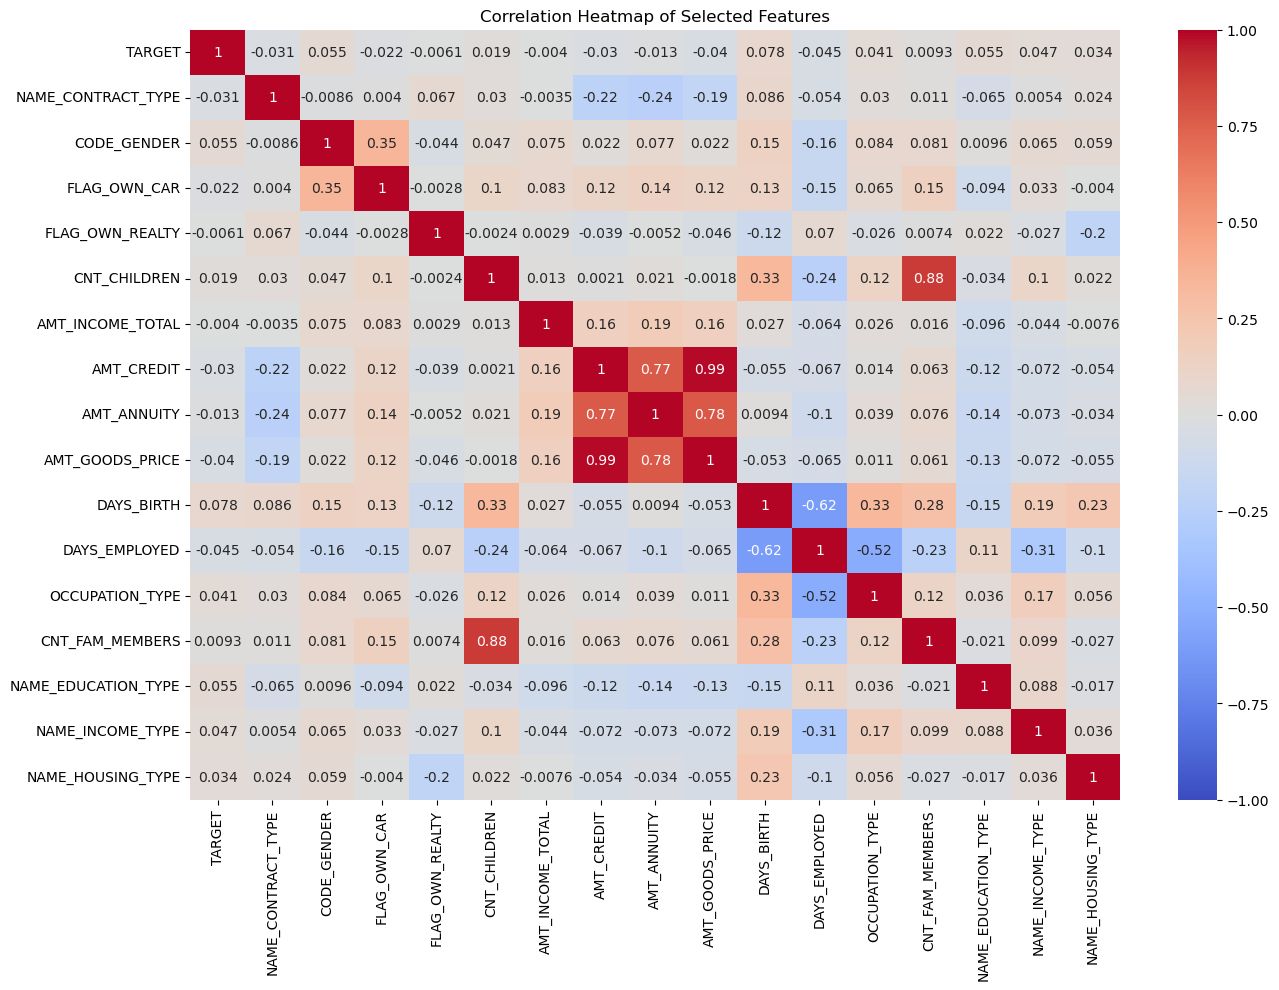

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the relevant columns
selected_columns = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 
                    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                    'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE']

# Filtering the dataset
subset_data = data[selected_columns]

# Converting categorical columns to category codes for correlation computation
for col in subset_data.select_dtypes(include=['object']).columns:
    subset_data[col] = subset_data[col].astype('category').cat.codes

# Computing the correlation matrix
correlation_matrix = subset_data.corr()

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Selected Features')
plt.show()


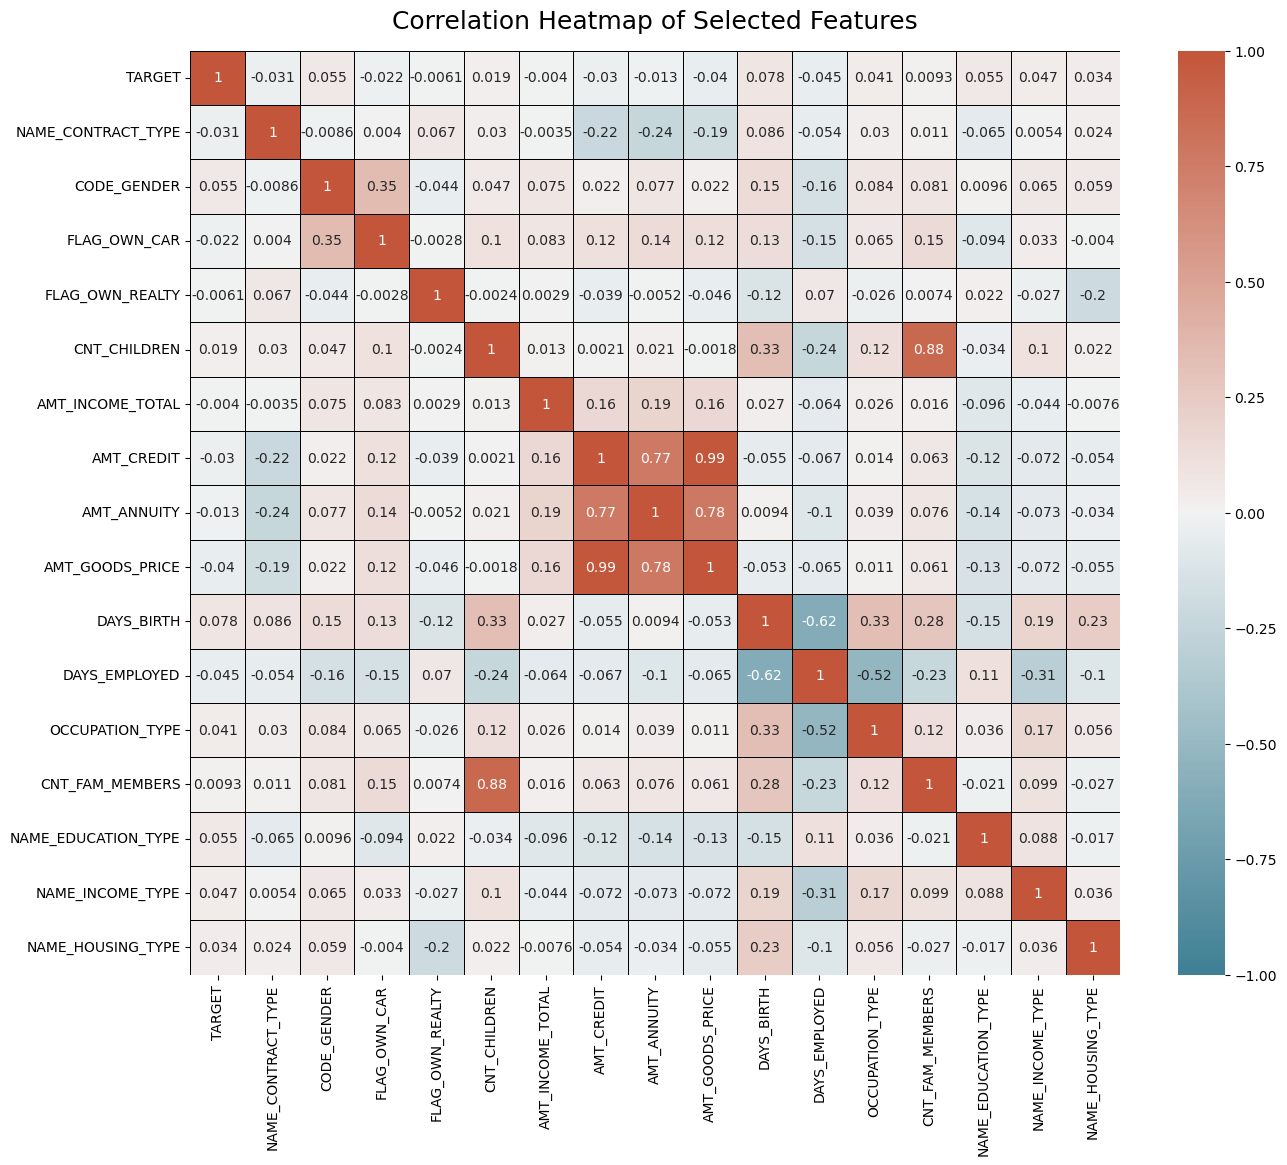

In [12]:

# Enhancing the heatmap's aesthetics
plt.figure(figsize=(15, 12))
cmap = sns.diverging_palette(220, 20, as_cmap=True)  # Custom color palette
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=cmap, vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
heatmap.set_title('Correlation Heatmap of Selected Features', fontdict={'fontsize': 18}, pad=16)
plt.show()


Analysis of the Correlation Heatmap:
Color Spectrum: The heatmap uses a color spectrum from blue (negative correlation) to red (positive correlation). A value of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

Significant Correlations:

AMT_GOODS_PRICE and AMT_CREDIT have a high positive correlation, which is expected since the credit amount will typically be closely related to the price of the goods for which the loan is taken.
AMT_ANNUITY also has a positive correlation with both AMT_GOODS_PRICE and AMT_CREDIT, indicating that the annuity amount typically increases with the credit amount and the goods price.
DAYS_BIRTH and CNT_FAM_MEMBERS have a negative correlation, suggesting that as applicants age, the number of family members might decrease. This could be because older applicants might have grown-up children who've moved out.
DAYS_EMPLOYED has a negative correlation with TARGET, indicating that those who've been employed for longer are less likely to face loan application issues (or, conversely, those with employment issues are more likely to face loan application issues).
Redundant Features:

Since AMT_GOODS_PRICE and AMT_CREDIT are highly correlated, one of them might be considered redundant when building a predictive model. Including both might not provide much additional information.
Features with Low Correlation to Target:

Features like NAME_HOUSING_TYPE, NAME_CONTRACT_TYPE, and CODE_GENDER have low correlation values with the target, indicating that they might not be strong predictors for loan approval on their own. However, this doesn't mean they're unimportant, as their interaction with other features might still be significant.
This heatmap provides an initial understanding of the relationships between the features. The next step will be to determine feature importance by building a model.

# Step 2: Feature Importance


To determine the importance of each feature in predicting loan approval, we'll use the Random Forest algorithm. Random Forest is an ensemble learning method that can provide an estimate of feature importance directly. Here's the plan:

Data Preprocessing: We'll handle missing values and encode categorical variables.
Model Training: Train a Random Forest classifier on our dataset.
Feature Importance Extraction: Extract feature importance scores from the trained model.
Visualization: Visualize the importance scores using a bar chart.

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Splitting data into features (X) and target (y)
X = subset_data.drop(columns=['TARGET'])
y = subset_data['TARGET']

# Handling missing values by filling with median
X = X.fillna(X.median())

# Building the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extracting feature importances
feature_importances = rf.feature_importances_

# Creating a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

features_df


,Feature,Importance
9,DAYS_BIRTH,0.183214
10,DAYS_EMPLOYED,0.149584
7,AMT_ANNUITY,0.146975
6,AMT_CREDIT,0.114709
5,AMT_INCOME_TOTAL,0.112323
8,AMT_GOODS_PRICE,0.083074
11,OCCUPATION_TYPE,0.058029
12,CNT_FAM_MEMBERS,0.034135
4,CNT_CHILDREN,0.021206
3,FLAG_OWN_REALTY,0.020762


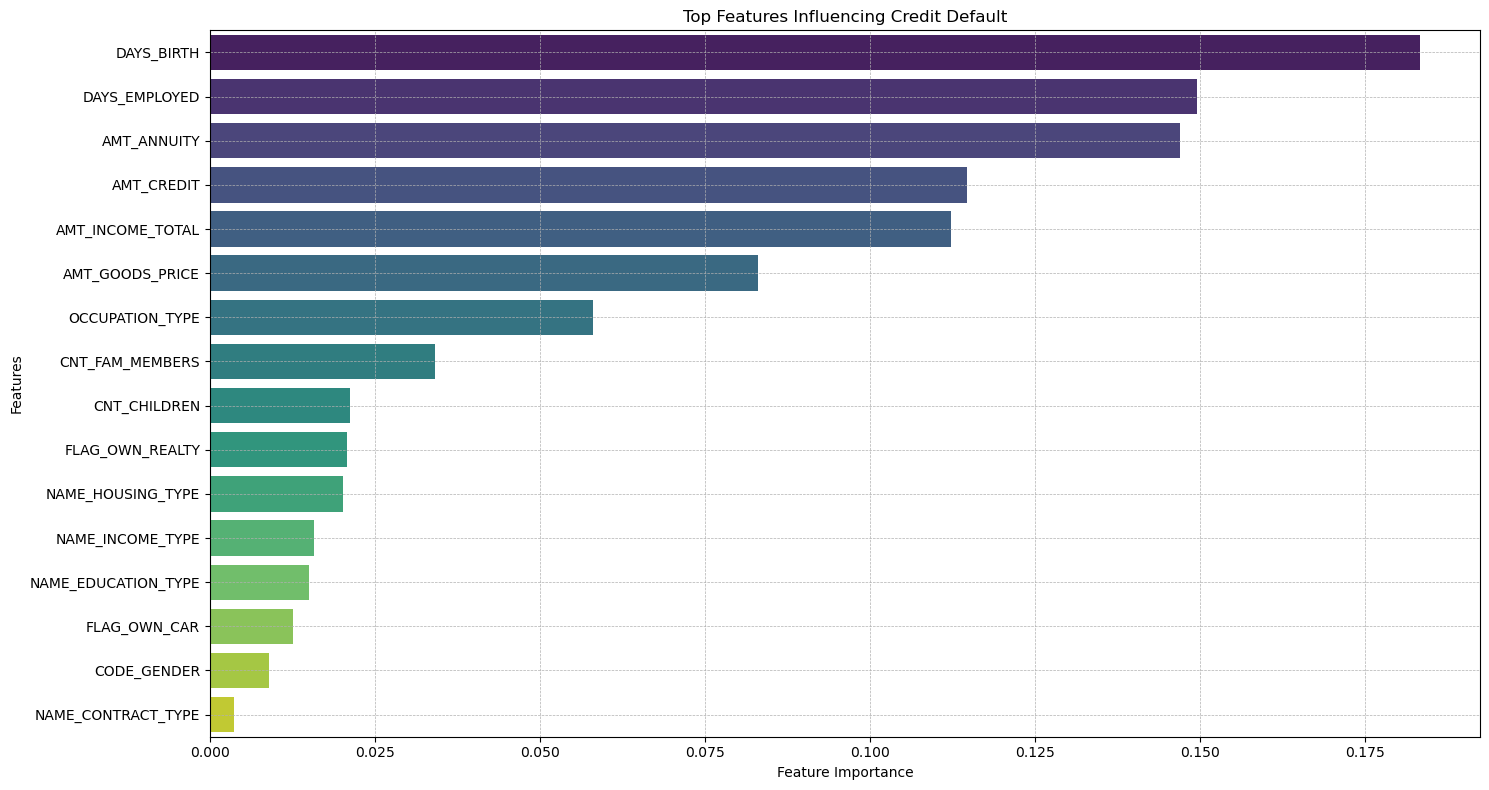

In [5]:
# Plotting the top features
plt.figure(figsize=(15, 8))
sns.barplot(x='Importance', y='Feature', data=features_df, palette="viridis")
plt.title("Top Features Influencing Credit Default")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

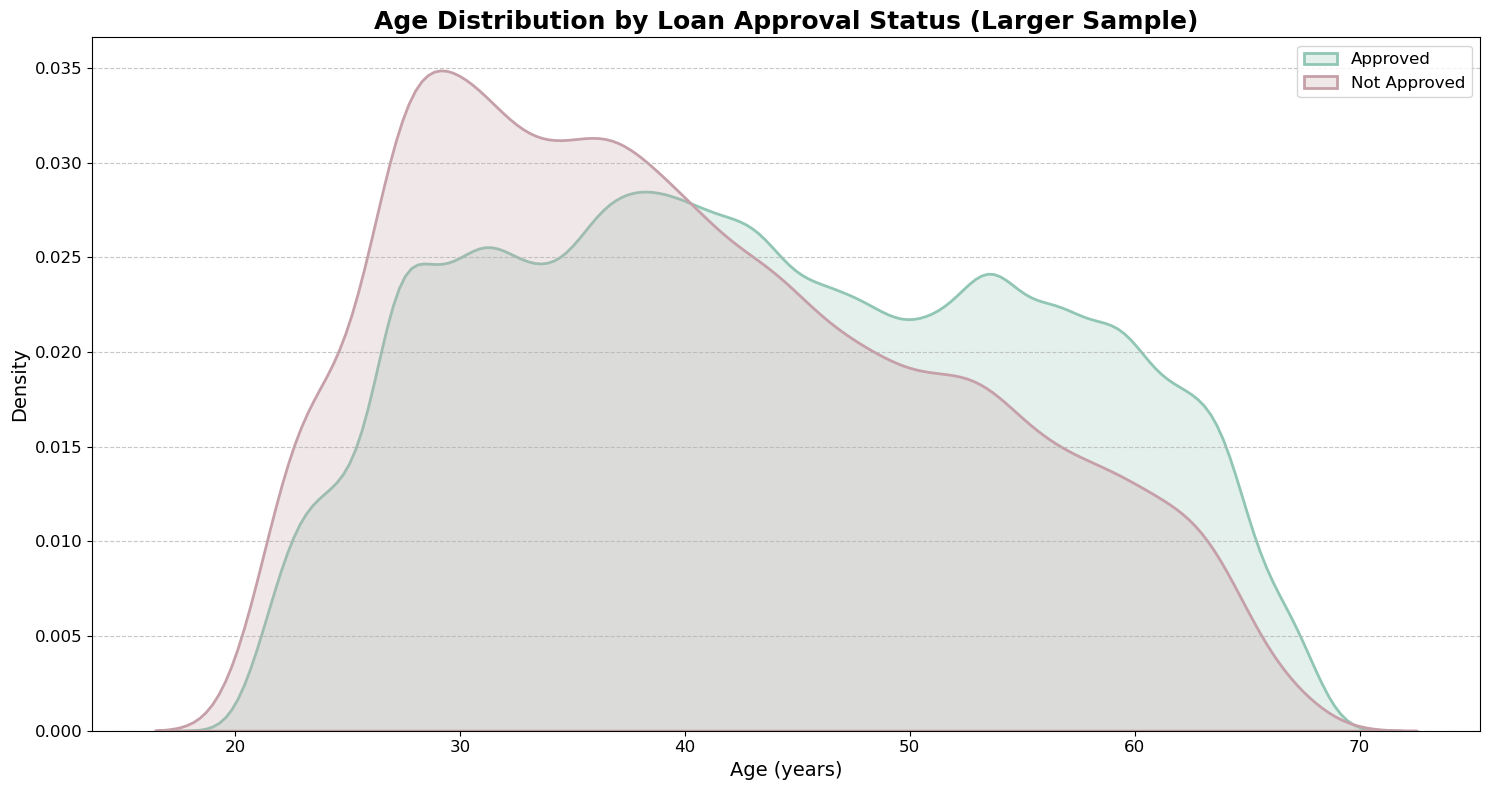

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert DAYS_BIRTH to years for the larger sample for better interpretability
data['AGE_YEARS'] = (-data['DAYS_BIRTH'] / 365).astype(int)

# Enhanced visualization with more elegant colors and formatting for the larger sample

plt.figure(figsize=(15, 8))

# Using muted, elegant color tones
sns.kdeplot(data[data['TARGET'] == 0]['AGE_YEARS'], label='Approved', shade=True, color='#91c6b3', lw=2)  # Pastel green
sns.kdeplot(data[data['TARGET'] == 1]['AGE_YEARS'], label='Not Approved', shade=True, color='#c6a0a9', lw=2)  # Pastel pink

# Formatting enhancements
plt.title('Age Distribution by Loan Approval Status ', fontsize=18, fontweight='bold')
plt.xlabel('Age (years)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


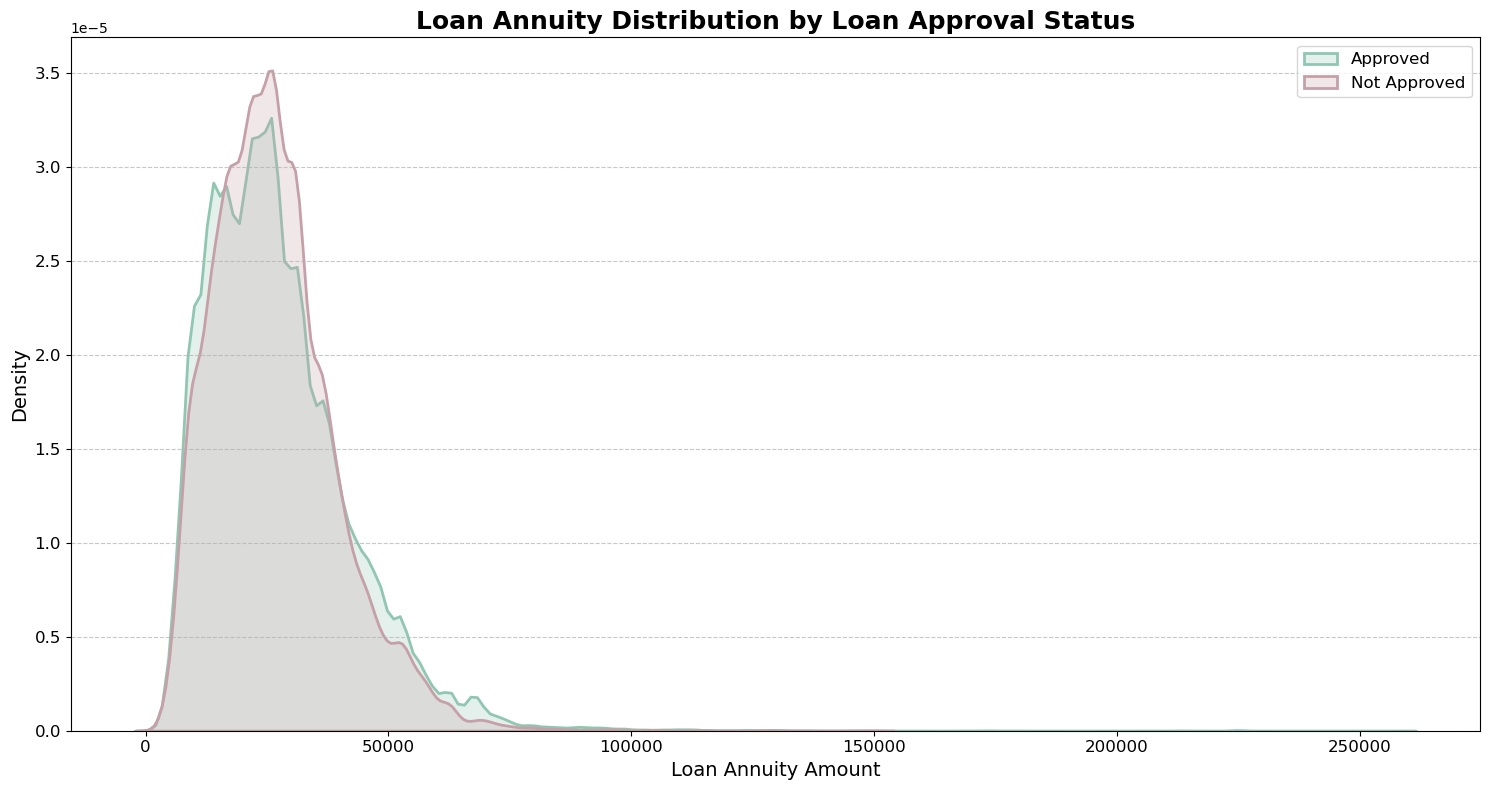

In [11]:
# Visualizing the distribution of AMT_ANNUITY for approved and not-approved loans

plt.figure(figsize=(15, 8))

# Using muted, elegant color tones
sns.kdeplot(data[data['TARGET'] == 0]['AMT_ANNUITY'].dropna(), label='Approved', shade=True, color='#91c6b3', lw=2)  # Pastel green
sns.kdeplot(data[data['TARGET'] == 1]['AMT_ANNUITY'].dropna(), label='Not Approved', shade=True, color='#c6a0a9', lw=2)  # Pastel pink

# Formatting enhancements
plt.title('Loan Annuity Distribution by Loan Approval Status', fontsize=18, fontweight='bold')
plt.xlabel('Loan Annuity Amount', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

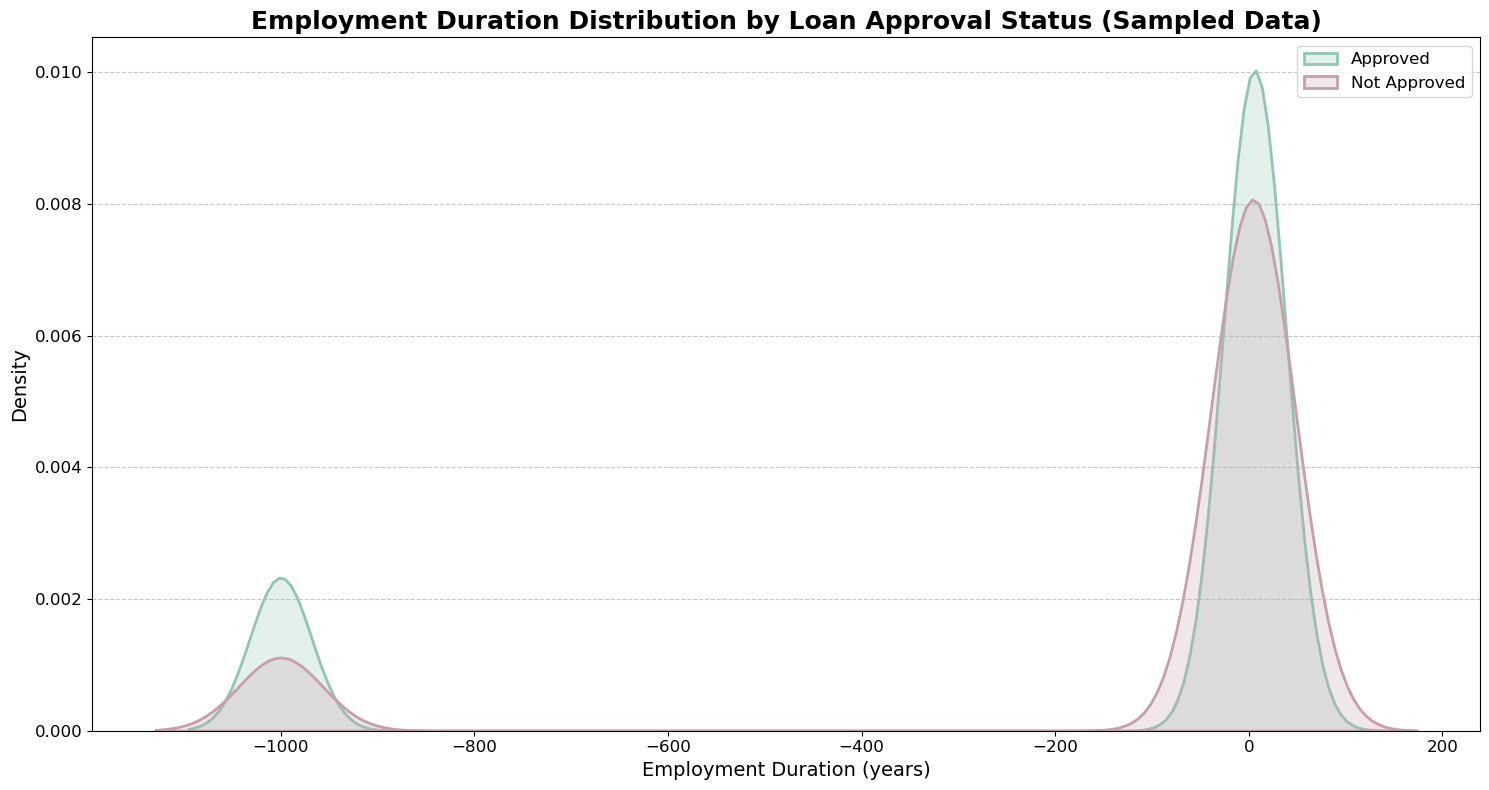

In [10]:
# Convert DAYS_EMPLOYED to years for better interpretability in the sampled data
data['EMPLOYMENT_YEARS'] = (-data['DAYS_EMPLOYED'] / 365).astype(int)

# Visualizing the distribution of EMPLOYMENT_YEARS for approved and not-approved loans

plt.figure(figsize=(15, 8))

# Using muted, elegant color tones
sns.kdeplot(data[data['TARGET'] == 0]['EMPLOYMENT_YEARS'].dropna(), label='Approved', shade=True, color='#91c6b3', lw=2)  # Pastel green
sns.kdeplot(data[data['TARGET'] == 1]['EMPLOYMENT_YEARS'].dropna(), label='Not Approved', shade=True, color='#c6a0a9', lw=2)  # Pastel pink

# Formatting enhancements
plt.title('Employment Duration Distribution by Loan Approval Status ', fontsize=18, fontweight='bold')
plt.xlabel('Employment Duration (years)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



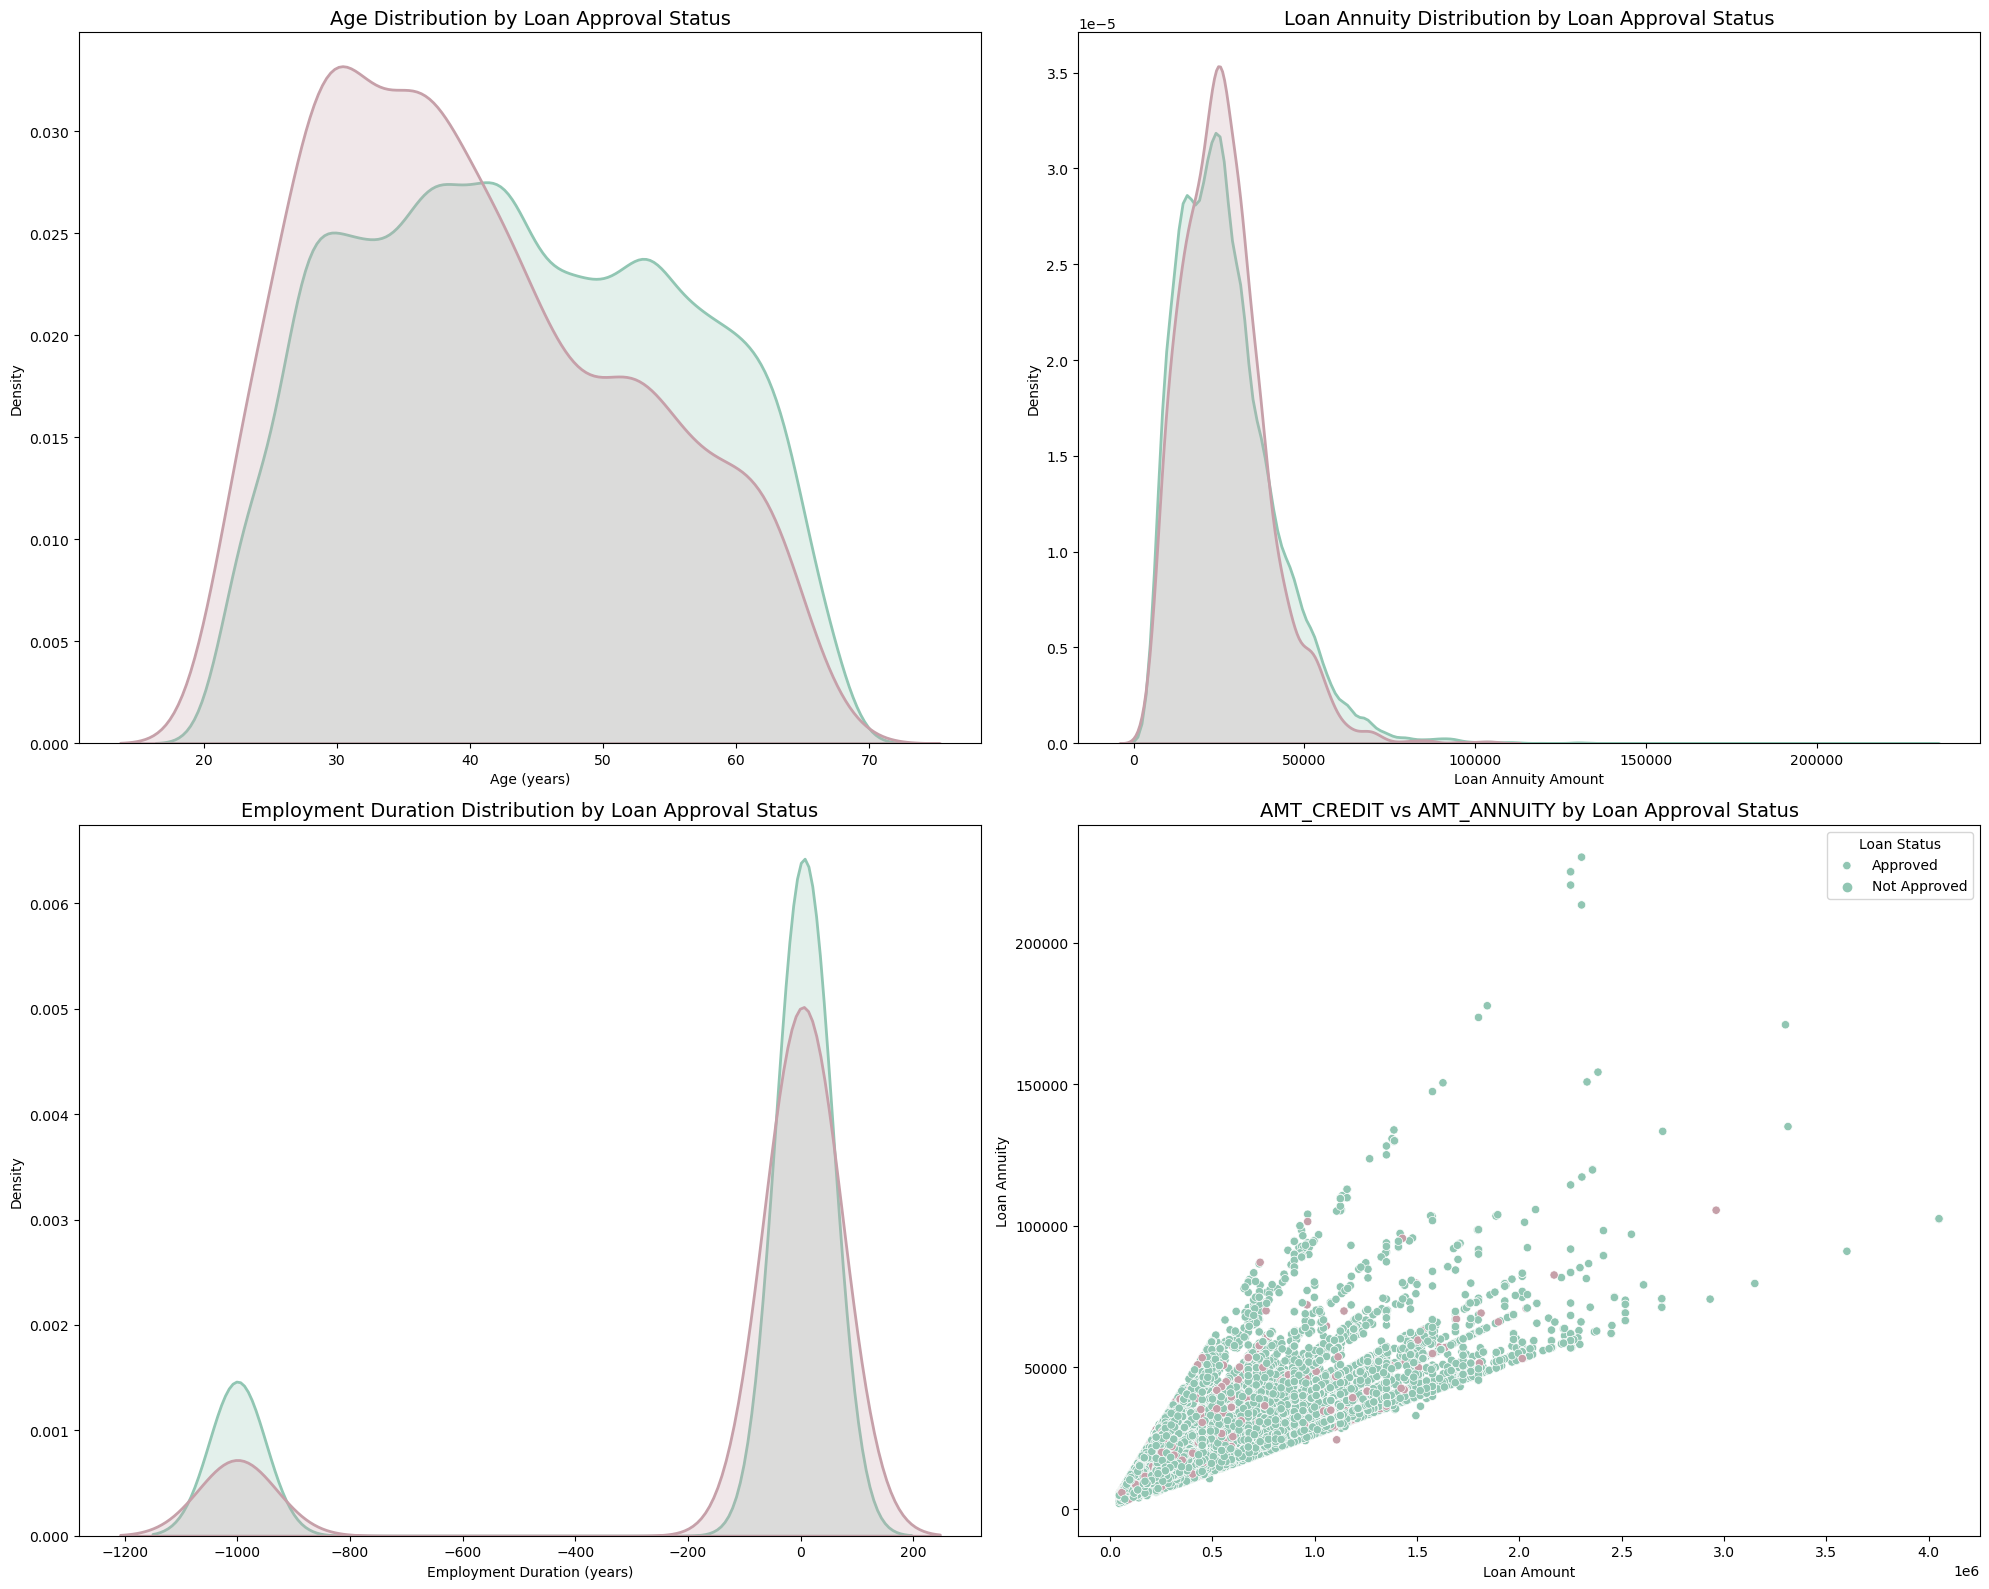

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reload the dataset
data = pd.read_csv('application_data.csv')

# Taking a random sample (10%) of the data to avoid memory issues
sampled_data = data.sample(frac=0.1, random_state=42)

# Pre-processing for the visualizations
sampled_data['AGE_YEARS'] = (-sampled_data['DAYS_BIRTH'] / 365).astype(int)
sampled_data['EMPLOYMENT_YEARS'] = (-sampled_data['DAYS_EMPLOYED'] / 365).astype(int)

# Creating the combined plot
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Age Distribution Plot
sns.kdeplot(sampled_data[sampled_data['TARGET'] == 0]['AGE_YEARS'], ax=axes[0, 0], label='Approved', shade=True, color='#91c6b3', lw=2)
sns.kdeplot(sampled_data[sampled_data['TARGET'] == 1]['AGE_YEARS'], ax=axes[0, 0], label='Not Approved', shade=True, color='#c6a0a9', lw=2)
axes[0, 0].set_title('Age Distribution by Loan Approval Status', fontsize=14)
axes[0, 0].set_xlabel('Age (years)')
axes[0, 0].set_ylabel('Density')

# Loan Annuity Distribution Plot
sns.kdeplot(sampled_data[sampled_data['TARGET'] == 0]['AMT_ANNUITY'].dropna(), ax=axes[0, 1], label='Approved', shade=True, color='#91c6b3', lw=2)
sns.kdeplot(sampled_data[sampled_data['TARGET'] == 1]['AMT_ANNUITY'].dropna(), ax=axes[0, 1], label='Not Approved', shade=True, color='#c6a0a9', lw=2)
axes[0, 1].set_title('Loan Annuity Distribution by Loan Approval Status', fontsize=14)
axes[0, 1].set_xlabel('Loan Annuity Amount')
axes[0, 1].set_ylabel('Density')

# Employment Duration Distribution Plot
sns.kdeplot(sampled_data[sampled_data['TARGET'] == 0]['EMPLOYMENT_YEARS'].dropna(), ax=axes[1, 0], label='Approved', shade=True, color='#91c6b3', lw=2)
sns.kdeplot(sampled_data[sampled_data['TARGET'] == 1]['EMPLOYMENT_YEARS'].dropna(), ax=axes[1, 0], label='Not Approved', shade=True, color='#c6a0a9', lw=2)
axes[1, 0].set_title('Employment Duration Distribution by Loan Approval Status', fontsize=14)
axes[1, 0].set_xlabel('Employment Duration (years)')
axes[1, 0].set_ylabel('Density')

# Scatter Plot of AMT_CREDIT vs AMT_ANNUITY
sns.scatterplot(data=sampled_data, x='AMT_CREDIT', y='AMT_ANNUITY', hue='TARGET', palette=['#91c6b3', '#c6a0a9'], ax=axes[1, 1])
axes[1, 1].set_title('AMT_CREDIT vs AMT_ANNUITY by Loan Approval Status', fontsize=14)
axes[1, 1].set_xlabel('Loan Amount')
axes[1, 1].set_ylabel('Loan Annuity')
axes[1, 1].legend(title='Loan Status', labels=['Approved', 'Not Approved'])

# Adjust layout
plt.tight_layout()
plt.show()


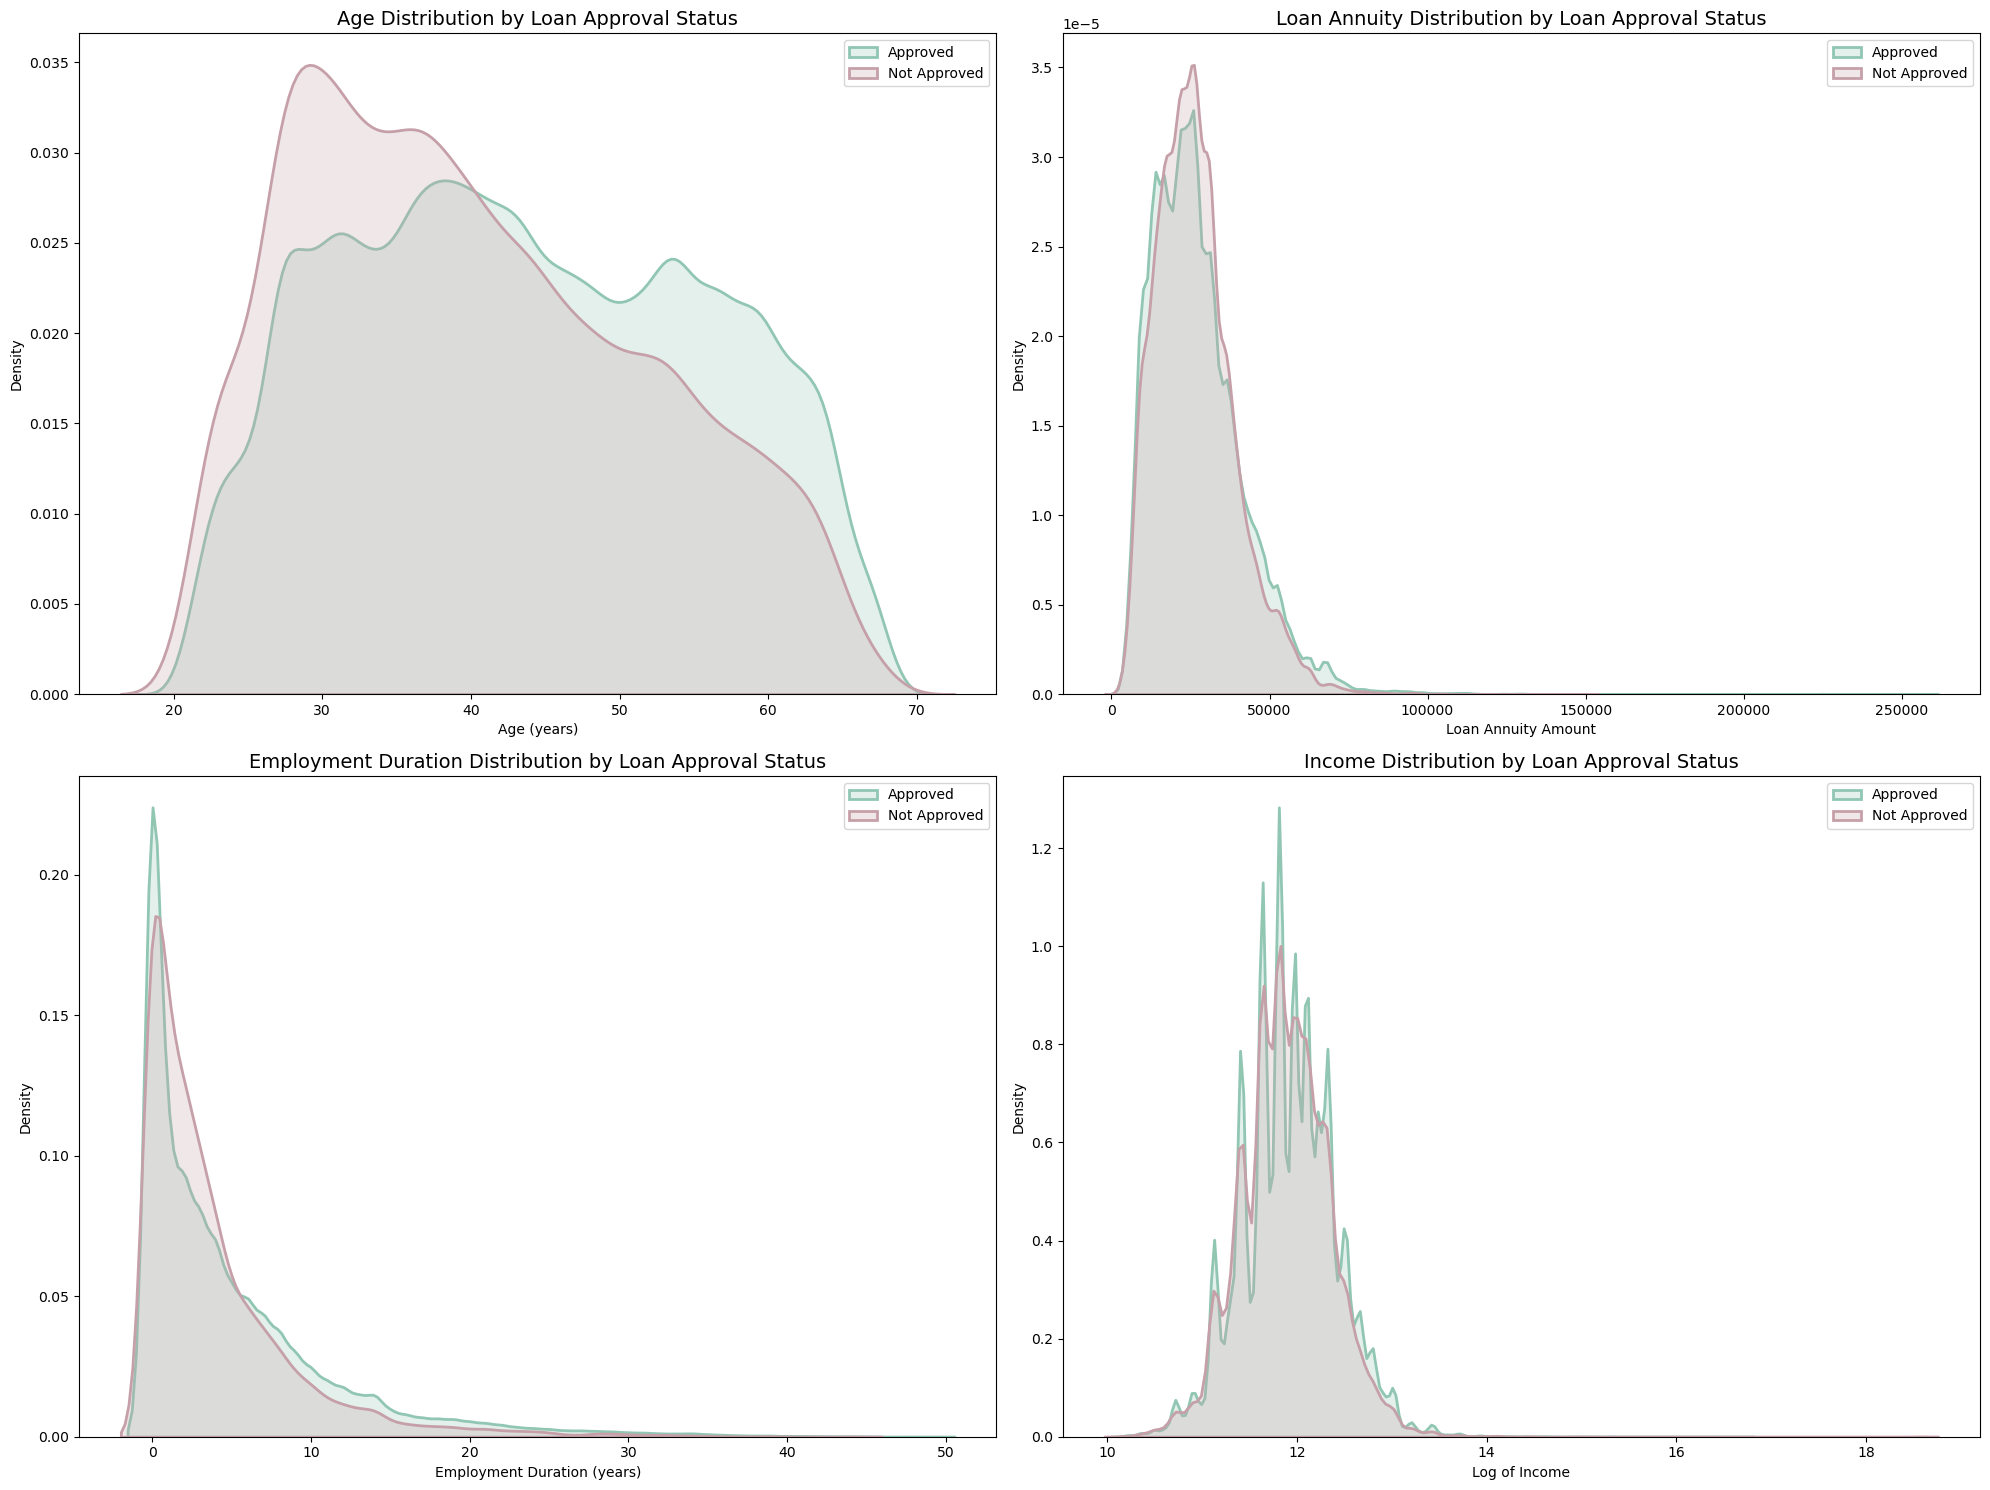

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('application_data.csv')

# Convert DAYS_BIRTH to years for better interpretability
data['AGE_YEARS'] = (-data['DAYS_BIRTH'] / 365).astype(int)

# Convert DAYS_EMPLOYED to years for better interpretability
# Note: Negative values in DAYS_EMPLOYED indicate the person is not currently employed.
# These values will be set to 0 for simplification.
data['EMPLOYMENT_YEARS'] = data['DAYS_EMPLOYED'].apply(lambda x: (-x / 365) if x < 0 else 0).astype(int)

# Let's identify an additional meaningful relationship to visualize.
# One potential candidate could be the relationship between income and loan approval.
# We'll create a simple visualization comparing income distributions for approved and not-approved loans.
data['LOG_INCOME'] = np.log1p(data['AMT_INCOME_TOTAL'])  # Using log transformation for better visualization

# Prepare for combined visualization
plt.figure(figsize=(20, 15))

# Subplot 1: Age Distribution
plt.subplot(2, 2, 1)
sns.kdeplot(data[data['TARGET'] == 0]['AGE_YEARS'], label='Approved', shade=True, color='#91c6b3', lw=2)
sns.kdeplot(data[data['TARGET'] == 1]['AGE_YEARS'], label='Not Approved', shade=True, color='#c6a0a9', lw=2)
plt.title('Age Distribution by Loan Approval Status', fontsize=14)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.legend()

# Subplot 2: Loan Annuity Distribution
plt.subplot(2, 2, 2)
sns.kdeplot(data[data['TARGET'] == 0]['AMT_ANNUITY'].dropna(), label='Approved', shade=True, color='#91c6b3', lw=2)
sns.kdeplot(data[data['TARGET'] == 1]['AMT_ANNUITY'].dropna(), label='Not Approved', shade=True, color='#c6a0a9', lw=2)
plt.title('Loan Annuity Distribution by Loan Approval Status', fontsize=14)
plt.xlabel('Loan Annuity Amount')
plt.ylabel('Density')
plt.legend()

# Subplot 3: Employment Duration Distribution
plt.subplot(2, 2, 3)
sns.kdeplot(data[data['TARGET'] == 0]['EMPLOYMENT_YEARS'].dropna(), label='Approved', shade=True, color='#91c6b3', lw=2)
sns.kdeplot(data[data['TARGET'] == 1]['EMPLOYMENT_YEARS'].dropna(), label='Not Approved', shade=True, color='#c6a0a9', lw=2)
plt.title('Employment Duration Distribution by Loan Approval Status', fontsize=14)
plt.xlabel('Employment Duration (years)')
plt.ylabel('Density')
plt.legend()

# Subplot 4: Income Distribution
plt.subplot(2, 2, 4)
sns.kdeplot(data[data['TARGET'] == 0]['LOG_INCOME'], label='Approved', shade=True, color='#91c6b3', lw=2)
sns.kdeplot(data[data['TARGET'] == 1]['LOG_INCOME'], label='Not Approved', shade=True, color='#c6a0a9', lw=2)
plt.title('Income Distribution by Loan Approval Status', fontsize=14)
plt.xlabel('Log of Income')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()
